In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing Dataset
dataset link :- https://drive.google.com/file/d/1zfqvs8-mAO6E0JpgvhBdueNx8Th03pUp/view?usp=sharing

In [2]:
df = pd.read_csv(r"{....}\datafile (1).csv")

In [3]:
df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [65]:
df.isna().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [64]:
df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [7]:
print(df.columns)

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)'],
      dtype='object')


In [6]:
df.rename(columns={'Yield (Quintal/ Hectare) ' : 'Yield (Quintal/ Hectare)'}, inplace = True)

              COC in A2+FL  COC in C2
COC in A2+FL      1.000000   0.981225
COC in C2         0.981225   1.000000


[]

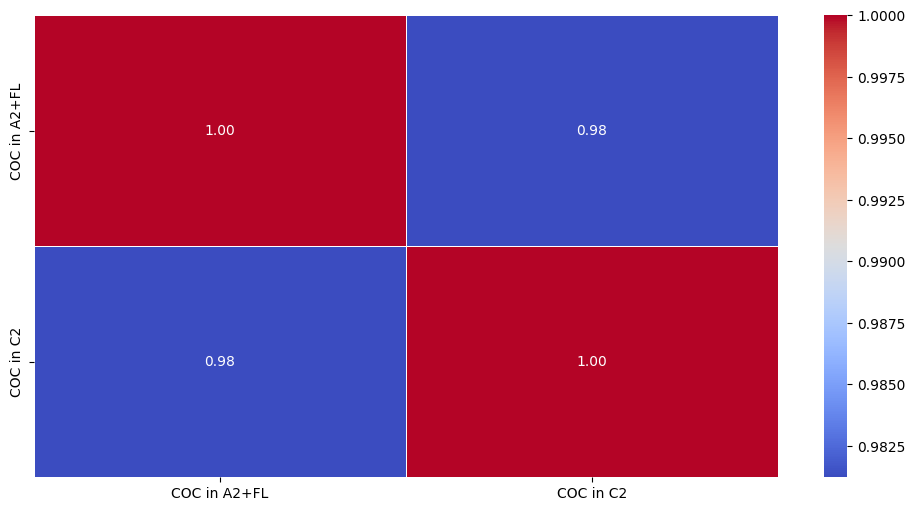

In [77]:
data = pd.DataFrame({"COC in A2+FL" : df["Cost of Cultivation (`/Hectare) A2+FL"], "COC in C2" : df["Cost of Cultivation (`/Hectare) C2"]})
co = data.corr()
print(co)

plt.figure(figsize=(12, 6))
sns.heatmap(co, annot=True, cmap="coolwarm", fmt="0.2f", linewidth = 0.5)
plt.plot()

           COC in C2     Yeild
COC in C2   1.000000  0.866424
Yeild       0.866424  1.000000


[]

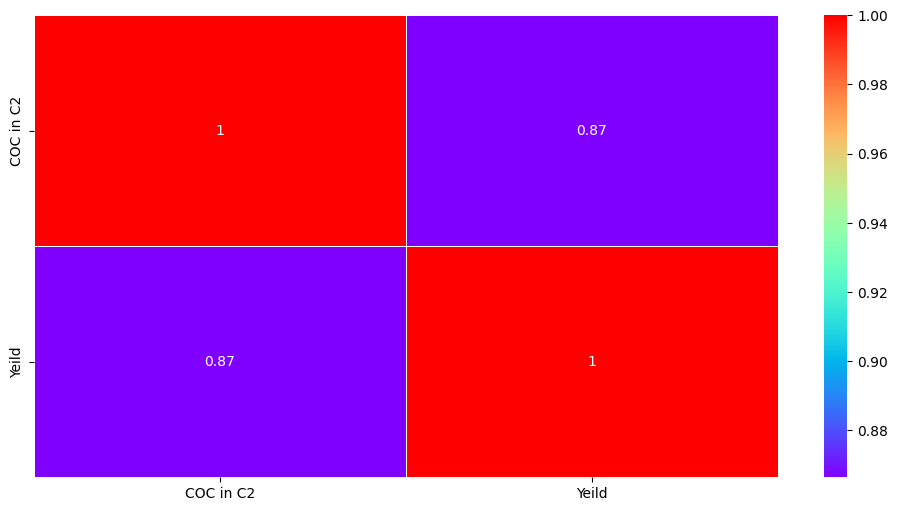

In [89]:
# high corelation
data2 = pd.DataFrame({"COC in C2" : df["Cost of Cultivation (`/Hectare) C2"], "Yeild" : df["Yield (Quintal/ Hectare)"]})
co2 = data2.corr()
print(co2)
plt.figure(figsize = (12, 6))
sns.heatmap(co2, annot=True, cmap="rainbow", linewidth=0.5)
plt.plot()

           COC in A2   Yeild
COC in A2     1.0000  0.8634
Yeild         0.8634  1.0000


<Axes: >

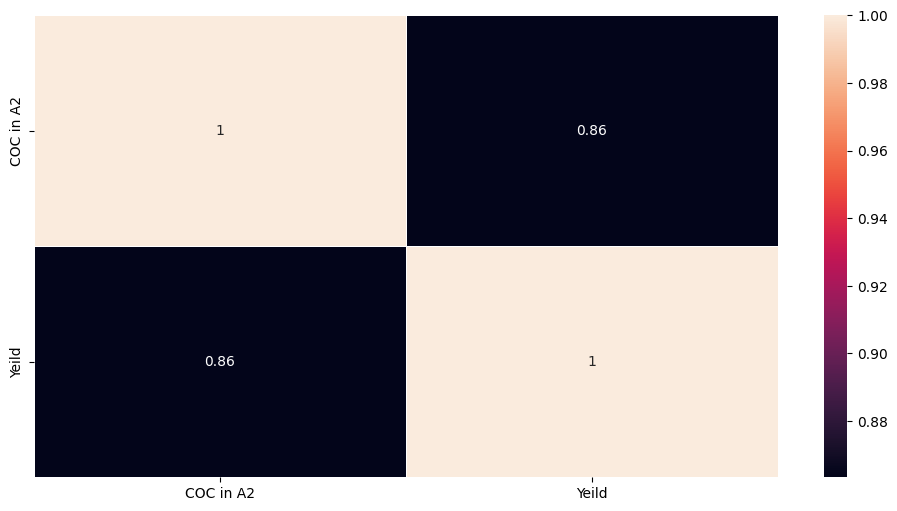

In [84]:
# low correlation 
data3 = pd.DataFrame({"COC in A2" : df["Cost of Cultivation (`/Hectare) A2+FL"], "Yeild" : df["Yield (Quintal/ Hectare)"]})
co3 = data3.corr()
print(co3)

plt.figure(figsize=(12,6))
sns.heatmap(co3, annot=True, linewidth=0.5)

Mean Squared Error: 3817.58634082933
R-squared Score: 0.9577408948570683


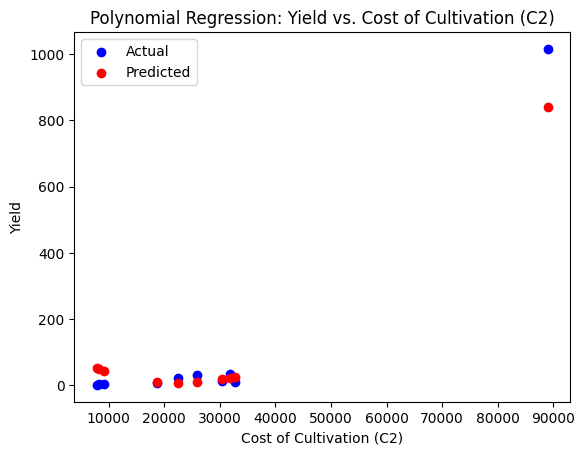

In [70]:
# Load your dataset (Replace 'data' with your actual dataframe)
X = data2[['COC in C2']]  # Independent variable
y = data2['Yeild']  # Dependent variable

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features (Try degree=2 first)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test set
y_pred = model.predict(X_test_poly)

# Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualize Results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Cost of Cultivation (C2)")
plt.ylabel("Yield")
plt.legend()
plt.title("Polynomial Regression: Yield vs. Cost of Cultivation (C2)")
plt.show()